In [1]:
# Notebook configurations
import sys
import dotenv
import os
import warnings

dotenv.load_dotenv()
sys.path.append(f'{os.getenv("ROOT_DIR")}')
sys.path.append(f'{os.getenv("ROOT_DIR")}\\script')

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import catboost as cb
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefinedclustered.csv')
df

,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,bicarbonate_mean,...,insurance_Medicare,insurance_Private,insurance_Self Pay,icu_level,GMM_Cluster_UMAP,DBSCAN_Cluster_UMAP,HDBSCAN_Cluster_UMAP,Spectral_Cluster_UMAP,Birch_Cluster_UMAP,KMeans_Cluster_UMAP
0,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,18.00,...,True,False,False,2,0,0,2,2,0,0
1,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,28.00,...,False,False,False,0,0,0,2,2,0,0
2,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,20.25,...,True,False,False,1,1,0,2,2,2,2
3,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,22.50,...,False,True,False,0,1,0,2,2,2,2
4,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,25.50,...,True,False,False,0,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,20.50,...,True,False,False,0,1,0,2,2,2,2
10189,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,21.50,...,True,False,False,0,2,1,10,3,3,1
10190,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,19.75,...,False,True,False,1,0,0,2,2,0,0
10191,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,22.50,...,True,False,False,0,1,0,2,2,2,2


In [4]:
columns_to_remove = ["lods", "mlods", "sapsii", "apsiii", "sofa", "oasis"]
df = df.drop(columns_to_remove, axis=1)

In [5]:
y = df['icu_level']
X = df.drop(columns=['icu_level'])

In [6]:
# Scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
random_forest_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)
svm_model = SVC(probability=True, random_state=42)
logistic_regression_model = LogisticRegression(random_state=42)
naive_bayes_model = GaussianNB()
xgb_model = xgb.XGBClassifier(random_state=42)
catboost_model = cb.CatBoostClassifier(random_state=42, verbose=0)

In [9]:
ensemble_models = [
    ('Random Forest', random_forest_model),
    ('GBM', gbm_model),
    ('SVM', svm_model),
    ('Logistic Regression', logistic_regression_model),
    ('Naive Bayes', naive_bayes_model),
    ('XGBoost', xgb_model),
]

In [10]:
hard_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

In [11]:
soft_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

In [12]:
models = [random_forest_model, gbm_model, svm_model,
          logistic_regression_model, naive_bayes_model, xgb_model,
          hard_voting_ensemble, soft_voting_ensemble]

In [13]:
accuracy_scores = {}
for model in models:    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model.__class__.__name__] = accuracy
    print(f"{model.__class__.__name__} Accuracy: {accuracy:.4f}")

RandomForestClassifier Accuracy: 0.8740
GradientBoostingClassifier Accuracy: 0.8906
SVC Accuracy: 0.8308
LogisticRegression Accuracy: 0.8367
GaussianNB Accuracy: 0.8077
XGBClassifier Accuracy: 0.8897
VotingClassifier Accuracy: 0.8735
VotingClassifier Accuracy: 0.8838


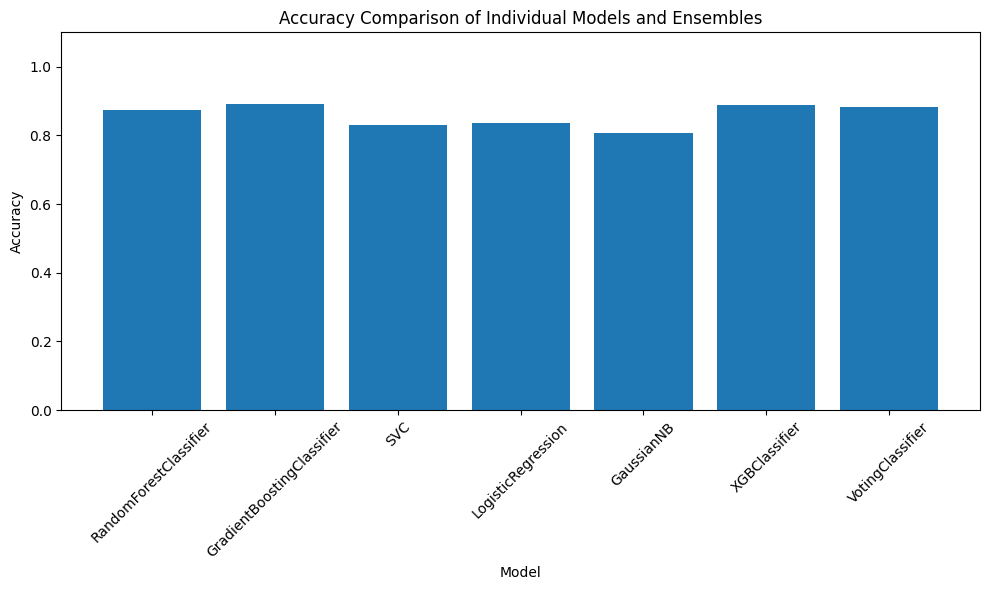

In [14]:
# Plot the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Individual Models and Ensembles')
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()


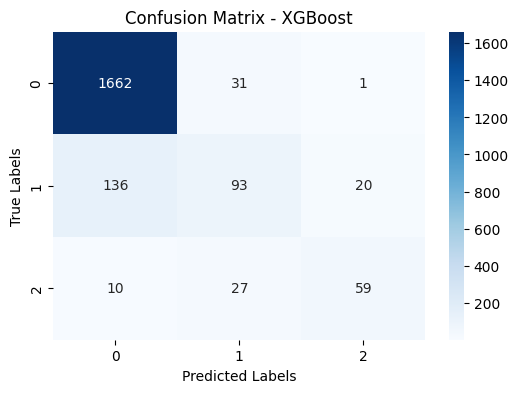

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using the XGBoost model
y_pred_xgb = xgb_model.predict(X_test)

# Create the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - XGBoost")
plt.show()


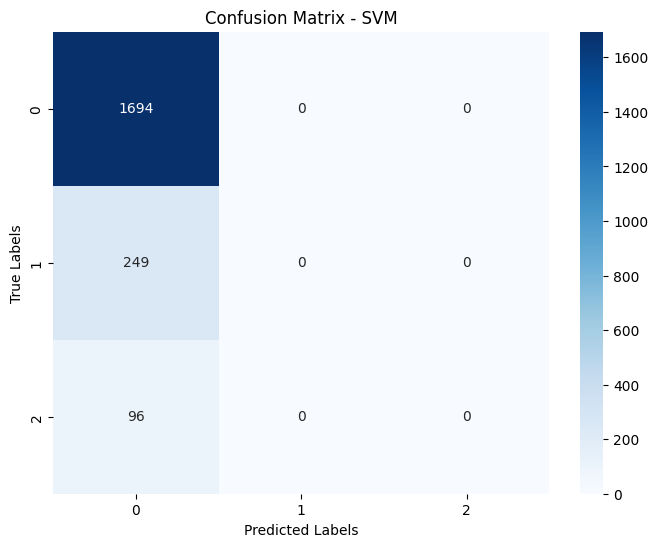

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predict using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Create the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap="Blues", fmt="d", xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - SVM")
plt.show()


In [17]:
columns_to_exclude = ["icu_level"]
feature_names = df.drop(columns=columns_to_exclude).columns

In [18]:
feature_importance_rf = random_forest_model.feature_importances_

for feature_name, importance in zip(feature_names, feature_importance_rf):
    print(f"{feature_name}: {importance}")


heartrate_mean: 0.01791663310629403
sysbp_mean: 0.032836484661427565
diasbp_mean: 0.014256467142818864
meanbp_mean: 0.01978085816353957
resprate_mean: 0.01715754696470718
tempc_mean: 0.01814171516841347
spo2_mean: 0.019424258978790247
glucose_mean: 0.015203587106667478
aniongap_mean: 0.023916838937021553
bicarbonate_mean: 0.023910355475874147
creatinine_mean: 0.02784823698715537
chloride_mean: 0.014161679524756823
hematocrit_mean: 0.014763204513815614
hemoglobin_mean: 0.013260237348840222
lactate_mean: 0.0205775661661043
platelet_mean: 0.01959712679725775
potassium_mean: 0.014620323183608957
ptt_mean: 0.017986746056964847
inr_mean: 0.014454142948208048
pt_mean: 0.01620613460259103
sodium_mean: 0.014378796538728329
bun_mean: 0.04003691731122766
wbc_mean: 0.01839674752747703
first_wardid: 0.007429150143490933
last_wardid: 0.006446979936316845
los: 0.01891565305187209
los_hospital: 0.015471834424245788
admission_age: 0.014274026756282395
hospital_expire_flag: 0.020095747370318207
hospstay

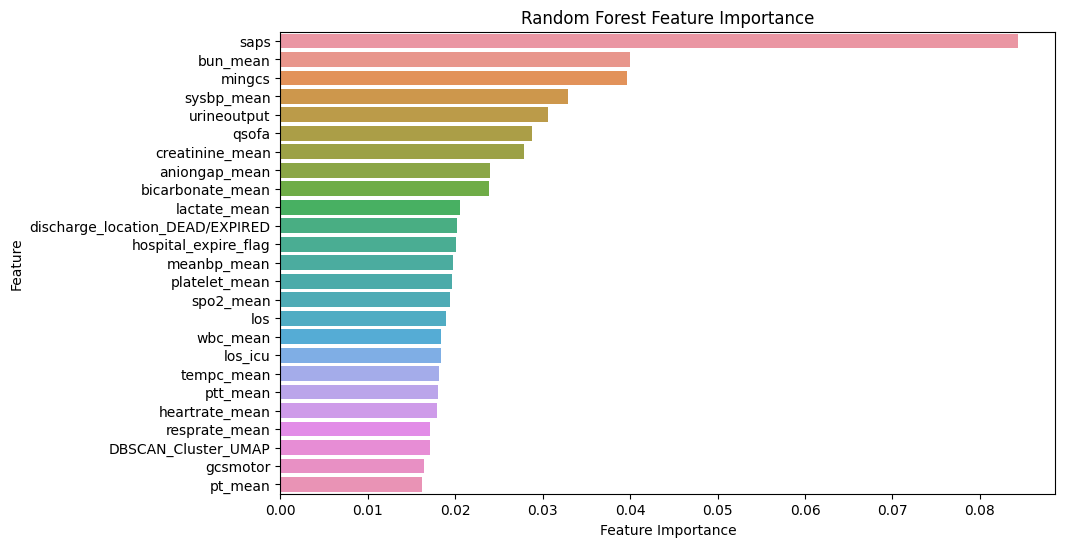

In [19]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_rf})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(25)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

In [20]:
feature_importance_gbm = gbm_model.feature_importances_

for feature_name, importance in zip(feature_names, feature_importance_gbm):
    print(f"{feature_name}: {importance}")


heartrate_mean: 0.007764803036315351
sysbp_mean: 0.07403546007358673
diasbp_mean: 0.0032899837942535646
meanbp_mean: 0.002736943189838547
resprate_mean: 0.004263122979739265
tempc_mean: 0.006938243980636592
spo2_mean: 0.01434489446682465
glucose_mean: 0.0038318092673738065
aniongap_mean: 0.008314592285498714
bicarbonate_mean: 0.005158849695554969
creatinine_mean: 0.017056479765118836
chloride_mean: 0.003052907877223168
hematocrit_mean: 0.0017080134799600491
hemoglobin_mean: 0.0027701947759020246
lactate_mean: 0.0027040771412076632
platelet_mean: 0.014819858975217324
potassium_mean: 0.005956536278931409
ptt_mean: 0.002504517730264202
inr_mean: 0.005661876216102058
pt_mean: 0.00862105984491865
sodium_mean: 0.0017708921238105111
bun_mean: 0.06656403152408571
wbc_mean: 0.00835799503315793
first_wardid: 0.0003398414461837412
last_wardid: 0.00016356711760861655
los: 0.012582128227609126
los_hospital: 0.006821486313619859
admission_age: 0.003789950624807024
hospital_expire_flag: 0.02908251273

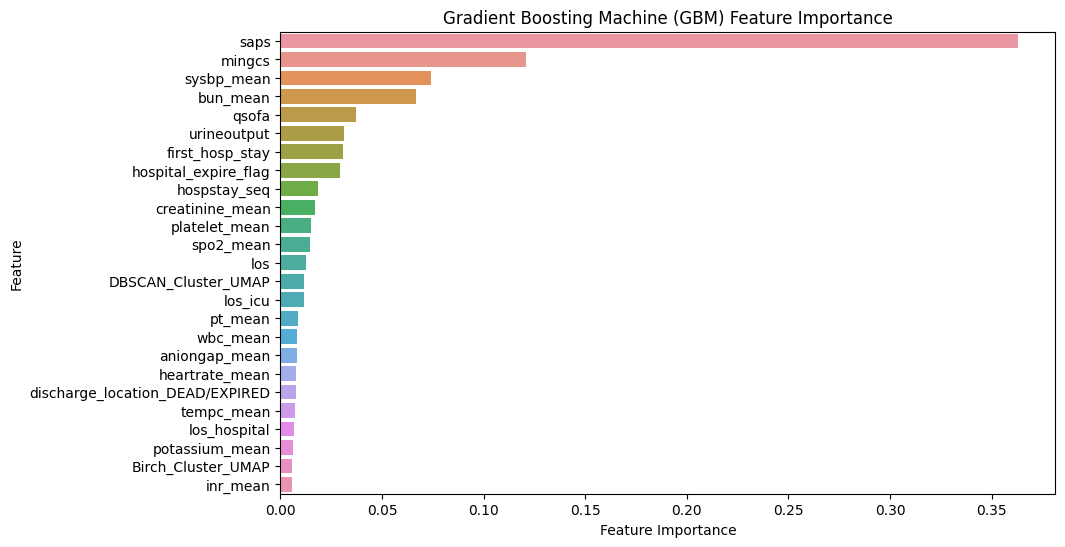

In [21]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_gbm})

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(25)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Machine (GBM) Feature Importance')
plt.show()

In [22]:
feature_importance_xgb = xgb_model.get_booster().get_score(importance_type='weight')

# Assuming you have a list of feature names, replace 'feature_names' with your actual feature names
for feature_name, importance in feature_importance_xgb.items():
    print(f"{feature_name}: {importance}")


heartrate_mean: 251.0
sysbp_mean: 468.0
diasbp_mean: 205.0
meanbp_mean: 211.0
resprate_mean: 266.0
tempc_mean: 274.0
spo2_mean: 302.0
glucose_mean: 266.0
aniongap_mean: 220.0
bicarbonate_mean: 151.0
creatinine_mean: 299.0
chloride_mean: 204.0
hematocrit_mean: 168.0
hemoglobin_mean: 187.0
lactate_mean: 198.0
platelet_mean: 339.0
potassium_mean: 251.0
ptt_mean: 238.0
inr_mean: 134.0
pt_mean: 235.0
sodium_mean: 179.0
bun_mean: 412.0
wbc_mean: 307.0
first_wardid: 83.0
last_wardid: 78.0
los: 345.0
los_hospital: 288.0
admission_age: 296.0
hospital_expire_flag: 65.0
hospstay_seq: 113.0
los_icu: 2.0
row_id: 285.0
gender: 21.0
diagnosis: 181.0
mingcs: 332.0
gcsmotor: 68.0
gcsverbal: 68.0
gcseyes: 69.0
endotrachflag: 1.0
urineoutput: 402.0
vent: 61.0
weight: 167.0
weight_admit: 72.0
weight_daily: 196.0
rrt: 7.0
qsofa: 113.0
saps: 383.0
sirs: 60.0
marital_status_DIVORCED: 11.0
marital_status_MARRIED: 31.0
marital_status_SEPARATED: 1.0
marital_status_SINGLE: 8.0
marital_status_WIDOWED: 10.0
ethnic

In [23]:
len(feature_importance_xgb)

93

In [24]:
len(feature_names)

116

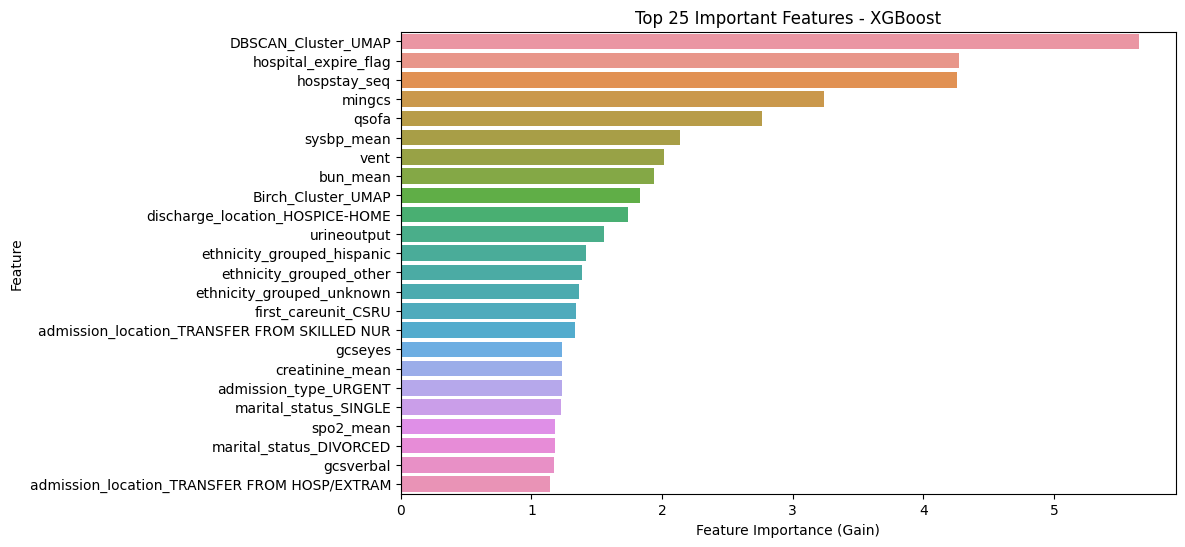

In [25]:
# Get feature importance using 'gain' as an example, but you can change it to 'weight' or 'cover' if needed
feature_importance_xgb = xgb_model.get_booster().get_score(importance_type='gain')

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame.from_dict(feature_importance_xgb, orient='index', columns=['Importance'])
feature_importance_df.reset_index(inplace=True)
feature_importance_df.rename(columns={'index': 'Feature'}, inplace=True)

# Sort the DataFrame by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 'k' important features
top_k = 25  # Change this number to show more or fewer top features
top_k_features = feature_importance_df.head(top_k)

# Plotting XGBoost feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_k_features[1:top_k])
plt.xlabel('Feature Importance (Gain)')
plt.ylabel('Feature')
plt.title('Top ' + str(top_k) + ' Important Features - XGBoost')
plt.show()

In [26]:
df_CLUSTERED = pd.read_csv(f'{os.getenv("ROOT_DIR")}\\data\\finalrefinedclustered.csv')
df_CLUSTERED

,heartrate_mean,sysbp_mean,diasbp_mean,meanbp_mean,resprate_mean,tempc_mean,spo2_mean,glucose_mean,aniongap_mean,bicarbonate_mean,...,insurance_Medicare,insurance_Private,insurance_Self Pay,icu_level,GMM_Cluster_UMAP,DBSCAN_Cluster_UMAP,HDBSCAN_Cluster_UMAP,Spectral_Cluster_UMAP,Birch_Cluster_UMAP,KMeans_Cluster_UMAP
0,111.785714,102.960000,55.720000,75.692812,17.361111,37.002881,97.870968,232.416667,19.000000,18.00,...,True,False,False,2,0,0,2,2,0,0
1,92.500000,159.375000,79.525000,98.850000,14.369565,37.049383,97.650000,161.285714,13.000000,28.00,...,False,False,False,0,0,0,2,2,0,0
2,71.385714,101.817016,44.110723,65.891024,16.838690,36.796465,98.057598,160.000000,21.000000,20.25,...,True,False,False,1,1,0,2,2,2,2
3,72.906250,100.000000,46.583333,63.324330,16.031250,36.333333,97.096774,164.766667,13.000000,22.50,...,False,True,False,0,1,0,2,2,2,2
4,51.230769,114.153846,59.923077,79.923077,12.066667,36.958333,98.714286,108.142857,9.500000,25.50,...,True,False,False,0,0,0,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10188,93.676471,117.111111,51.166667,69.194444,18.200000,36.936000,98.562500,129.434783,11.500000,20.50,...,True,False,False,0,1,0,2,2,2,2
10189,86.185185,111.068966,55.206897,69.206897,15.678571,36.555128,97.592593,124.684211,11.000000,21.50,...,True,False,False,0,2,1,10,3,3,1
10190,95.006944,106.881558,59.216216,72.278219,15.500000,36.516204,97.685484,130.333333,15.000000,19.75,...,False,True,False,1,0,0,2,2,0,0
10191,74.461538,130.730769,53.923077,72.769231,22.600000,36.111111,94.423077,138.000000,17.000000,22.50,...,True,False,False,0,1,0,2,2,2,2


In [27]:
# Step 1: Get the unique cluster labels
unique_clusters = df_CLUSTERED['GMM_Cluster_UMAP'].unique()
unique_clusters

array([0, 1, 2, 4, 3], dtype=int64)

In [28]:
cluster_datasets = {}

In [29]:
for cluster_label in unique_clusters:
    cluster_datasets[cluster_label] = df_CLUSTERED[df_CLUSTERED['GMM_Cluster_UMAP'] == cluster_label]
cluster_datasets    

{0:        heartrate_mean  sysbp_mean  diasbp_mean  meanbp_mean  resprate_mean  \
 0          111.785714  102.960000    55.720000    75.692812      17.361111   
 1           92.500000  159.375000    79.525000    98.850000      14.369565   
 4           51.230769  114.153846    59.923077    79.923077      12.066667   
 9          126.879130   91.573333    50.199167    63.990556      29.031667   
 10         112.444444  114.629630    61.518519    79.222208      17.130435   
 ...               ...         ...          ...          ...            ...   
 10173       62.545455  145.181818    58.454545    85.500000      17.615385   
 10175       91.621773   99.786878    61.534603    69.172381      14.148019   
 10186       88.424242  110.500000    58.147059    74.676471      12.727273   
 10187       97.178571   99.258065    53.322581    67.806452      23.742857   
 10190       95.006944  106.881558    59.216216    72.278219      15.500000   
 
        tempc_mean  spo2_mean  glucose_mean  an

In [30]:
ensemble_models = [
    ('Random Forest', random_forest_model),
    ('GBM', gbm_model),
    ('SVM', svm_model),
    ('Logistic Regression', logistic_regression_model),
    ('Naive Bayes', naive_bayes_model),
    ('XGBoost', xgb_model),
]

In [31]:
hard_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='hard')

In [32]:
soft_voting_ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

In [33]:
models = [random_forest_model, gbm_model, svm_model,
          logistic_regression_model, naive_bayes_model, xgb_model,
          hard_voting_ensemble, soft_voting_ensemble]

In [34]:
from imblearn.over_sampling import SMOTE

accuracy_scores = {}

for cluster_label, cluster_data in cluster_datasets.items():
    print(f"Training models for Cluster {cluster_label}")
    y = cluster_data['icu_level']
    X = cluster_data.drop(columns=['icu_level'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    for model in models:    
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        model_name = f"{model.__class__.__name__} (Cluster {cluster_label})"
        accuracy_scores[model_name] = accuracy
        print(f"{model_name} Accuracy: {accuracy:.4f}")

Training models for Cluster 0
RandomForestClassifier (Cluster 0) Accuracy: 1.0000
GradientBoostingClassifier (Cluster 0) Accuracy: 1.0000
SVC (Cluster 0) Accuracy: 0.4325
LogisticRegression (Cluster 0) Accuracy: 0.6275
GaussianNB (Cluster 0) Accuracy: 0.9012
XGBClassifier (Cluster 0) Accuracy: 1.0000


In [ ]:
num = 1
for model, score in accuracy_scores.items():
    if(num == 8):
        print("--------------------")
        print("\n")
        num = 0
    print(model, score)
    num = num + 1